# Autoencoder neuronal

Exxxxxx

---

    [ES] Código de Alfredo Cuesta Infante para 'Reconocimiento de Patrones'
       @ Master Universitario en Visión Artificial, 2020, URJC (España)
    [EN] Code by Alfredo Cuesta-Infante for 'Pattern Recognition'
       @ Master of Computer Vision, 2020, URJC (Spain)

    alfredo.cuesta@urjc.es    

#### Preliminares
Paquetes de propósito general (_numpy_, _matplotlib_)

In [1]:
#-[0]. General purpose packages

import numpy as np
import matplotlib.pyplot as plt

**Cargar el MNIST**

In [2]:
#-[1]. Load images. Keras has a few benchmark datasets readily available.

from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

#--- Get info of train and test data sets
N_train,dim0,dim1 = x_train.shape
N_test,dim0,dim1  = x_test.shape
num_pixels = dim0*dim1

### Construcción del autoencoder

In [3]:
def dense_stack(x, num_neurons, activation="relu"):
    h1 = Dense(num_neurons[0], activation=activation)(x)
    h2 = Dense(num_neurons[1], activation=activation)(h1)
    h3 = Dense(num_neurons[2], activation=activation)(h2)
    y  = Dense(num_neurons[3], activation=activation)(h3)
    return y

In [4]:
#-[2]. Modeling the neural network in three different ways

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

neuron_list = [num_pixels, 300, 100, 50, 20]

input_model = Input( shape=(num_pixels) )

code = dense_stack( input_model, neuron_list[1:] )

output_model = dense_stack( code, neuron_list[-2::-1])

encoder = Model(input_model,code)
autoencoder = Model(input_model,output_model)
autoencoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                1050      
_________________________________________________________________
dense_5 (Dense)              (None, 100)              

### _Compilar_ el modelo

+ Para compilar el modelo tenemos que seleccionar un optimizador y una función de pérdida.
+ También se puede elegir un conjunto de métricas para evaluar el proceso de entrenamiento.

In [5]:
autoencoder.compile(optimizer='adam', loss='mse')

## Aprendizaje

**1. Preparamos el conjunto de datos para que pueda ser procesado por el modelo**  <br>
       _En este caso tenemos que serializar las imágenes, de matrices $28\times28$ a vectores de $784$_

In [6]:
x_train_flat = x_train.reshape( (N_train,num_pixels) )

**2. Ejecutar el método FIT**<br>
_Tensorflow_ sigue el estandar de Scikit-Learn. Pero a diferencia de otros métodos que hemos visto de ML, en DL hay que especificar algunas otra opciones como el número de épocas o el tamaño del lote.
+ El **número de épocas** indica cuantas veces se utiliza el conjunto de entrenamiento para realizar el aprendizaje
+ El **tamaño del lote** es el número de muestras que se utilizan para calcular el descenso del gradiente.

In [7]:
# Train the model, iterating on the data in batches of 32 samples
N_epochs = 3
batch_size = 32
autoencoder.fit(x_train_flat, x_train_flat, epochs=N_epochs, batch_size=batch_size)

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 2307.3906
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 1753.0968
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 1601.8444


## Test

**1. Debemos procesar los datos de test igual que procesamos los de entrenamiento**

In [8]:
x_test_flat = x_test.reshape( (N_test,num_pixels) )

**2. ejecutar el método PREDICT**

+ El método `evaluate` calcula el promedio de la pérdida y la(s) metrica(s) elegidas al compilar el modelo con tantos lotes como permita el tamaño del conjunto de datos y el tamaño del lote.

In [9]:
x_reconstructed = autoencoder.predict( x_test_flat )

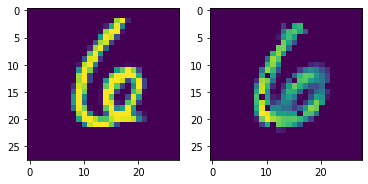

In [10]:
k = 123
plt.subplot(121)
plt.imshow(x_test[k,:].reshape([28,28]))
plt.subplot(122)
plt.imshow(x_reconstructed[k,:].reshape([28,28]))